In [1]:
import matplotlib.pyplot as plt
import numpy as np

Rayleighs densitetsfunktion ser ut som
$f(x;b) = (x/b^2) * exp(-x^2/(2b^2))$

Ponera att vi har en mängd observationer på en variabel och vi vill minsta-kvadrat-estimera vad b är. Vi kan börja med att numeriskt ta fram lite Rayleigh(1)-distribuerade variabler och plotta dem

Sannolikheten ska summera till 100%. Den summerade till 100.00%


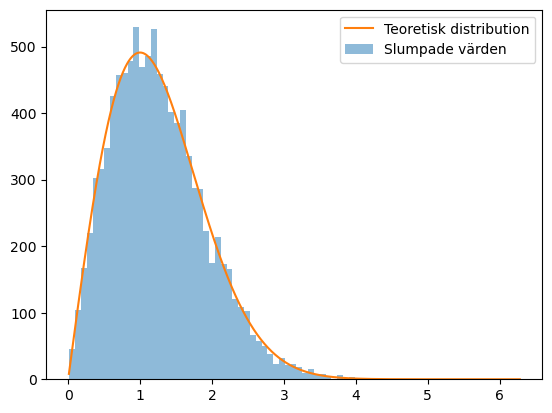

In [87]:
import numpy as np
import matplotlib.pyplot as plt
# Definera Rayleighs täthetsfunktion

# Gör N stycken slumpmässiga punkter. Gör dem som magnituden (längden) av en slumpmässig tvådimensionell vektor
# där båda riktningarna är normalfördelade N(0,1)
N = 10000
yh = np.sqrt(np.random.randn(N)**2 + np.random.randn(N)**2)
# Plotta histogrammet hur y är fördelad
num_bins=50
plt.hist(yh,bins=num_bins, alpha=0.5);
# Räkna ut Rayleigh-funktionen för x. Vi gör det numeriskt så vi tar lite punkter i (0,2pi] med dx mellan dem.
def f(x,b):
    return x/b**2*np.exp(-x**2/(2*b**2))
dx = 0.01
x = np.arange(dx, 2*np.pi, dx)
#b = np.sqrt(np.sum(yh**2) / len(yh)) # ML-estimeringen av b
b = 1  # Varför inte ML?
y = f(x, b)
# Plotta ut vår funktion på samma graf. Vi använder ML-skattningen av b som vi räknade ut innan. 
# Det är bara för att se hur bra ML-skattningen var. Vi har ju räknat ut histogram för N värden så vi
# måste räkna ut hur breda binsen är i histogrammet och multiplicera med det.
bin_width = (yh.max() - yh.min()) / num_bins
plt.plot(x, y*N*bin_width);
plt.legend(['Teoretisk distribution', 'Slumpade värden'])
# Sannolikheten ska summera till 100% med tillräckligt små dx
print(f'Sannolikheten ska summera till 100%. Den summerade till {sum(f(x, b)*dx)*100:.2f}%')

Vi kan göra en Minsta-kvadratskattning av B också. Om vi har våra yh (slumpade) så vill vi hitta b som minimerar

$error = ||y - yh||_2$

eller utskrivet minimera med avseende på b
$error = \sqrt{\sum{(f(x;b)-yh})^2} $

In [85]:
plt.hist?

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in each bin, then draws the distribution either as a
`.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
*weights* parameters are forwarded to `numpy.histogram`.

If the data has already been binned and counted, use `~.bar` or
`~.stairs` to plot the distribution::

    counts, bins = np.histogram(x)
    plt.stairs(counts, bins)

Alternatively, plot pre-computed bins and counts using ``hist()`` by
treating each bin as a single point with a weight equal to its count::

    plt.hist(bins[:-1], bins, weights=counts)

The data input

In [76]:
np.sqrt(np.sum(y**2)/len(y))

1.4078628452551207

0.9156981599999999

In [72]:
#df.to_parquet('fs.parquet')
df.index.name = 'hello_there'
df.reset_index()

,hello_there,Data,Value
0,0,a,10
1,1,b,20
2,2,c,30
3,3,d,40


In [64]:
df.reset_index().to_dict('records')

[{'index': 0, 'Data': 'a', 'Value': 10},
 {'index': 1, 'Data': 'b', 'Value': 20},
 {'index': 2, 'Data': 'c', 'Value': 30},
 {'index': 3, 'Data': 'd', 'Value': 40}]

In [53]:
con = duckdb.connect()
df2 = con.query("SELECT * from df WHERE Value>20").to_df()
df2.to_sql("testtable.parquet", schema="testschema",con=con)

C:\Users\p901fyf\AppData\Local\Temp\ipykernel_12328\2985053382.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2.to_sql("testtable.parquet", schema="testschema",con=con)


TransactionException: TransactionContext Error: cannot rollback - no transaction is active

In [51]:
df3 = con.execute("SELECT * from df WHERE Value>20").fetchall()
df3

[('c', 30), ('d', 40)]

In [6]:
logger.setLevel(log_config.logging.INFO)
log_config.logging.info(f'test info')
log_config.logging.error(f'test error')

INFO:root:test info
ERROR:root:test error


In [3]:
def option(strike, callflag):
    """ return a call or put option"""
    if callflag:
        return lambda spot: np.maximum(spot-strike,0)
    else:
        return lambda spot: np.maximum(strike-spot,0)


In [4]:
with open('C:\\Temp\\P901FYF_2022-11-10T090200_API.LOG') as f:
    for i in range(100):
        print(f'{f.readline()}')

[2022-11-10 09:02:07] [info   ] [source\utilities\logger.cpp::SwedbankLib::Logging::MakeLogger::operator class boost::shared_ptr<class SwedbankLib::Logging::LoggerHandle>: 187]: Setting up file logger: C:/TEMP/P901FYF_2022-11-10T090200_API.LOG with severity trace

[2022-11-10 09:02:07] [warning] SwedbankLib::MultiCurveCalculator::createSingleCurrencyTermStructures(): Setup failure for rate index SEK-STIBOR-3M with error:   source\termstructures\yield\ratehelpermanager.cpp(916): SwedbankLib::ForwardRateHelper::getRateHelpers(): Empty short end (FRA/FUT).

[2022-11-10 09:02:07] [info   ] [source\utilities\logger.cpp::SwedbankLib::Logging::MakeLogger::operator class boost::shared_ptr<class SwedbankLib::Logging::LoggerHandle>: 187]: Setting up file logger: C:/TEMP/P901FYF_2022-11-10T090200_API.LOG with severity trace

[2022-11-10 09:02:07] [warning] SwedbankLib::MultiCurveCalculator::createSingleCurrencyTermStructures(): Setup failure for rate index SEK-STIBOR-3M with error:   source\terms

In [4]:
o1 = option(139.16, True)
o2 = option(139.16, False)
o3 = option(141, True)
o4 = option(138, False)

In [5]:
sold_butterfly = lambda s: 200*1000*(o1(s) + o2(s)) - 600*1000*(o3(s) + o4(s))

In [6]:
s = np.linspace(136.5, 143, 100)
v = sold_butterfly(s)

Min breakeven is 137.48 and max breakeven is 141.88


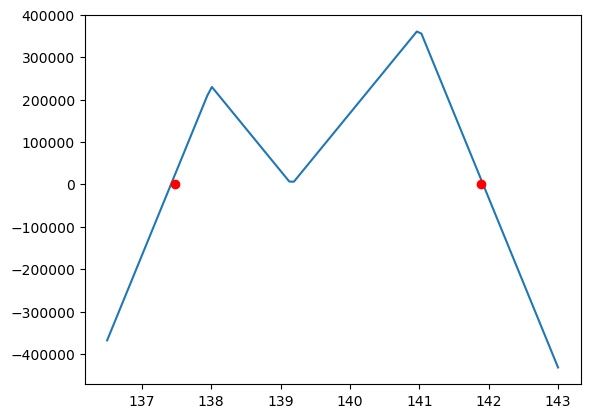

In [7]:
min_break = s[np.argmax(v > 21875)]
max_break = s[len(v) - np.argmax(v[::-1] > 21875)]
print(f'Min breakeven is {min_break:.2f} and max breakeven is {max_break:.2f}')
plt.plot(s,v)
plt.plot(min_break, 0, 'or', max_break, 0, 'or',)

In [8]:
import tf_quant_finance as tfq

ModuleNotFoundError: No module named 'tf_quant_finance'

In [9]:
o = tfq.black_scholes.option_price?

Object `tfq.black_scholes.option_price` not found.


In [ ]:
o = tfq.black_scholes.option_price

In [ ]:
o = tfq.black_scholes.option_price

In [24]:
import numpy as np
n = 20
m = 10
np.random.seed(1)
A = np.random.randn(m,n)
b = np.random.randn(m,1)

In [5]:
import tensorflow as tf
MAX_ITER=10
ADAM_ITER=100
rho=1.0

x = tf.Variable(tf.zeros((n, 1)), dtype=tf.float32) # parameter to optimze
y = tf.Variable(tf.zeros((m, 1)), dtype=tf.float32) # (multiplier) parameter to find

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, amsgrad=True)

for k in range(MAX_ITER):
    for l in range(ADAM_ITER):
        with tf.GradientTape() as g:
            g.watch([x])
            resid = A @ x - b
            loss = tf.norm(x,1) + tf.transpose(y)@resid + rho/2*tf.norm(resid,2)**2
        gradients = g.gradient(loss, [x])
        optimizer.apply_gradients(zip(gradients, [x]))
    
    y = y + rho * resid
    if k%2 == 0:
        print(loss.numpy()[0][0])
        

ModuleNotFoundError: No module named 'tensorflow'

In [74]:
tf.reduce_sum(y,resid)

InvalidArgumentError: Value for attr 'Tidx' of float is not in the list of allowed values: int32, int64
	; NodeDef: {{node Sum}}; Op<name=Sum; signature=input:T, reduction_indices:Tidx -> output:T; attr=keep_dims:bool,default=false; attr=T:type,allowed=[DT_FLOAT, DT_DOUBLE, DT_INT32, DT_UINT8, DT_INT16, ..., DT_UINT16, DT_COMPLEX128, DT_HALF, DT_UINT32, DT_UINT64]; attr=Tidx:type,default=DT_INT32,allowed=[DT_INT32, DT_INT64]> [Op:Sum]

In [69]:
tf.transpose(y)@resid

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.01402836]], dtype=float32)>

In [6]:
import torch 
import torch.optim as opt

MAX_ITER=10
ADAM_ITER=100
rho=1.0

x = torch.nn.Parameter(torch.tensor(np.zeros((n, 1)))) # parameter to optimze
y = torch.nn.Parameter(torch.tensor(np.zeros((m, 1)))) # (multiplier) parameter to find

optimizer = opt.Adam([x], amsgrad=True, lr = 0.01) # Define a optimizer

A_t = torch.tensor(A) # convert numpy array to tensor
b_t = torch.tensor(b)

for k in np.arange(0,MAX_ITER):      # loop over dual ascent
    for l in np.arange(0,ADAM_ITER): # loop over adam steps
        resid = torch.matmul(A_t,x)-b_t
        loss = torch.norm(x,1) +  torch.matmul(y.T,resid)+ rho/2.0*torch.norm(resid)**2
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    with torch.no_grad():
        y = y + rho*resid
    if k % 2 == 0:
        print(loss.item())
        

ModuleNotFoundError: No module named 'torch'

In [ ]:
tf.transpose(y)*resid

In [20]:
df = df>0

In [8]:
df[df>0]=99

In [6]:
df[~(df>0)]=99

In [21]:
df

,0,1
0,False,False
1,False,False
2,False,True
3,True,False
4,True,False


In [9]:
d2 = df>0
d2

,0,1
0,True,True
1,True,True
2,False,True
3,False,False
4,False,False


In [10]:
d2[d2] = 'A'

In [11]:
d2

,0,1
0,A,A
1,A,A
2,False,A
3,False,False
4,False,False


In [14]:
d2[d2==False] = 'B'

In [15]:
df

,0,1
0,A,A
1,A,A
2,B,A
3,B,B
4,B,B


In [22]:
x = np.where(x,'a','b')

In [23]:
df

array([['b', 'b'],
       ['b', 'b'],
       ['b', 'a'],
       ['a', 'b'],
       ['a', 'b']], dtype='<U1')

In [7]:
from zipline.api import order_target, record, symbol


def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)

ModuleNotFoundError: No module named 'zipline'

In [ ]:
import tensorflow as tf

In [8]:
import pyfinance as pyf

ModuleNotFoundError: No module named 'pyfinance'

In [16]:
import pandas as pd
import sqlalchemy as sql
con = sql.create_engine('mssql+pyodbc://fecquant-dev-db', fast_executemany=True)
df = pd.read_csv('C:\\Temp\\cal_maq.csv',sep=';')
df.head()

,Quote Address,Feed Address
0,Bond.100475.05-24-2023.2.00000,MAQP|C_NST475=MAQ
1,Bond.ABB FINANCE 0% EUR 19/01-2030.01-19-2030....,MAQP|C_ABBF19/01-30=MAQ
2,Bond.ABB FINANCE 0.625% EUR 03/05-23.05-03-202...,MAQP|C_ABB03/05-23=MAQ
3,Bond.ABB FINANCE 0.750% EUR 16/05-24.05-16-202...,MAQP|C_ABBF16/05-24=MAQ
4,Bond.ADB 0.2425% SEK 14/04-2023.04-14-2023.0.2...,MAQP|C_ADB14/04-23=MAQ


In [27]:
from sqlalchemy.types import BIGINT
#df.to_sql('tmp3',con=con,index=True,dtype={'ID': BIGINT})
#print("CREATE TABLE tmp5 (id INTEGER PRIMARY KEY AUTOINCREMENT, " + ",".join([f"{c.dtypes}" for c in df.columns]) + ")" )
#con.execute("CREATE TABLE tmp5 (id INTEGER PRIMARY KEY AUTOINCREMENT, " +
#         ",".join([f"{c.dtype}" for c in df.columns]) + ")" )

#df.to_sql('tmp5',con=con,index=True,if_exists='append')
df.dtypes

Quote Address    object
Feed Address     object
dtype: object

In [19]:
md = fp.MarketDataRequest(start_date = '1990-01-01', data_source='bloomberg', tickers=['IBM US Equity'], fields=['close'])dtype

AttributeError: module 'findatapy' has no attribute 'MarketDataRequest'

In [20]:
from findatapy.util import SwimPool; SwimPool()

In [21]:
from findatapy.market import Market, MarketDataRequest, MarketDataGenerator


In [29]:
md = MarketDataRequest(start_date = '1990-01-01', data_source='bloomberg', vendor_tickers=['IBM US Equity'], vendor_fields=['close'])

In [30]:
df =market.fetch_market(md)

2021-11-15 15:30:23,301 - findatapy.market.datavendorbbg - INFO - Request Bloomberg data
2021-11-15 15:30:23,330 - findatapy.market.datavendorbbg - INFO - Starting Bloomberg session...
2021-11-15 15:30:23,567 - findatapy.market.datavendorbbg - INFO - Returning session...
2021-11-15 15:30:25,817 - findatapy.market.datavendorbbg - INFO - Creating request...
2021-11-15 15:30:25,859 - findatapy.market.datavendorbbg - INFO - Sending Bloomberg Daily Request:HistoricalDataRequest = {
    startDate = "20211115"
    endDate = "20211115"
    fields[] = {
        "close"
    }
    securities[] = {
        "IBM US Equity"
    }
}

2021-11-15 15:30:26,294 - findatapy.market.datavendorbbg - INFO - Waiting for data to be returned...
2021-11-15 15:30:32,914 - findatapy.market.datavendorbbg - WARNING - No elements for ticker.
2021-11-15 15:30:32,971 - findatapy.market.datavendorbbg - INFO - Completed request from Bloomberg.
2021-11-15 15:30:33,106 - findatapy.market.marketdatagenerator - WARNING - No d

In [18]:
 market = Market(market_data_generator=MarketDataGenerator())

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [24]:
 market = Market(market_data_generator=MarketDataGenerator())

In [31]:
df

In [29]:
import duckdb

In [31]:
import pandas as pd

In [32]:
d = duckdb.connect()

In [41]:
df3 = pd.read_sql("SELECT * from v.parquet", d)

C:\Users\p901fyf\AppData\Local\Temp\ipykernel_12328\3325128671.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql("SELECT * from v.parquet", d)


In [36]:
df.to_parquet('v.parquet')

In [37]:
df2 = pd.read_parquet('v.parquet')

In [38]:
df2

,Data,Value
0,a,10
1,b,20
2,c,30
3,d,40


In [44]:
import pyarrow as pa

In [45]:
str(type(d))

"<class 'duckdb.DuckDBPyConnection'>"